In [46]:
import os
import glob
import itertools
from random import randint
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import time

import matplotlib.cm as cm
from IPython.display import Image
import git

from rmgpy.molecule import Molecule
from rmgpy.data.base import Database

In [47]:
#Input file
rmg_model_path = '../ammonia/'
analysis_path = '../ammonia_analysis/results/ammonia_results'

In [48]:
#Git-python: checkout master branch
import git
repo = git.Repo(rmg_model_path)
date = time.localtime(repo.head.commit.committed_date)
git_date = f"{date[0]}_{date[1]}_{date[2]}_{date[3]}{date[4]}"
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:50].replace(" ", "_").replace("'", "_").replace("\n", "")

current_commit = f"{git_date}_{git_sha}_{git_msg}"

current_commit

'2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries'

In [49]:
# #checkout 1 commit back
# repo.git.checkout('HEAD^1')
# sha = str(repo.head.commit)
# msg = str(repo.head.commit.message)
# print(sha,': ', msg)

# #checkout 2 commit back
# repo = git.Repo('/work/westgroup/lee.ting/cantera/ammonia/')
# repo.git.checkout('HEAD^1')
# sha = repo.head.commit
# msg = repo.head.commit.message
# print(sha,': ', msg)

In [50]:
commit_list = []

# read in each filename into dictionary. get a list of the commit folders in this repo
for path in Path(analysis_path).rglob('*.csv'):
    path_str = str(path)
    start_index = path_str.find(analysis_path)
    
    if start_index != -1:
        commit = path_str[(start_index+len(analysis_path)):]
        print(commit)
        if "\n" in commit:
            end_char = commit.index("\n")
        else: 
            end_char = commit.index("/")
        
        commit = commit[:end_char]
        if commit not in commit_list:
            commit_list.append(commit)
        
print(commit_list)   

/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_03.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_05.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_066.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_08.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_1.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0

/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_1_NH3_0_01.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_1_NH3_0_03.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_1_NH3_0_05.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_1_NH3_0_066.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_1_NH3_0_08.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_1_NH3_

/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_01.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_03.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_05.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_066.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_08.csv
/2021_6_5_1819_463449_master_523K_O088N006/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_

/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_03.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_05.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_066.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_08.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_1.csv
/2021_6_9_1041_c63d45_training_673K_all_famil

/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_1_NH3_0_01.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_1_NH3_0_03.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_1_NH3_0_05.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_1_NH3_0_066.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_1_NH3_0_08.csv
/2021_6_9_1041_c63d45_training_673K_all_fami

/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_01.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_03.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_05.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_066.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_08.csv
/2021_6_9_1041_c63d45_training_673K_all_fami

/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_4_NH3_0_05.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_4_NH3_0_066.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_4_NH3_0_08.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_4_NH3_0_1.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_4_NH3_0_12.csv
/2021_6_9_1041_c63d45_training_673K_all_famil

/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_01.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_03.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_05.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_066.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_08.csv
/2021_6_9_1041_c63d45_training_673K_all_fami

/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_1_NH3_0_01.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_1_NH3_0_03.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_1_NH3_0_05.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_1_NH3_0_066.csv
/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_1_NH3_0_08.csv
/2021_6_9_1041_c63d45_training_673K_all_fami

In [51]:
data_dict = {}

# Read last line from each CSV file to get the outlet concentrations from the PFR
# if "one_commit" is true, only run the master commit 
one_commit = False
if one_commit == True:
    commit_list = [current_commit]
    
for commit in commit_list:
    first_file = True
    for path in Path('../ammonia_analysis/results/ammonia_results').rglob('*.csv'):
        path_str = str(path)
        if os.stat(path_str).st_size >= 1e6:
            if first_file == True: 
                data = pd.read_csv(path_str)
                aggdata = data.tail(1)
                first_file = False
            else: 
                data = pd.read_csv(path_str)
                aggdata = aggdata.append(data.tail(1))
            data_dict.update({commit:aggdata})
        else:
            print(path_str)

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_03.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_08.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_1.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/498/results/Spinning_basket_area_1.11e-07_energy_off_temp_498_O2_0_1_NH3_0_12.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_4_NH3_0_05.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_4_NH3_0_066.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/548/results/Spinning_basket_area_1.11e-07_energy_off_temp_548_O2_0_4_NH3_0_08.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_1_NH3_0_01.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d4

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/573/results/Spinning_basket_area_1.11e-07_energy_off_temp_573_O2_0_6_NH3_0_08.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_01.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_03.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_1_NH3_0_05.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_6_NH3_0_08.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/598/results/Spinning_basket_area_1.11e-07_energy_off_temp_598_O2_0_7_NH3_0_066.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_1_NH3_0_03.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_1_NH3_0_05.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d4

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/623/results/Spinning_basket_area_1.11e-07_energy_off_temp_623_O2_0_6_NH3_0_066.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_01.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_05.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_1_NH3_0_066.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/648/results/Spinning_basket_area_1.11e-07_energy_off_temp_648_O2_0_6_NH3_0_12.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_01.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_03.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_1_NH3_0_066.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d4

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_6_NH3_0_08.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/673/results/Spinning_basket_area_1.11e-07_energy_off_temp_673_O2_0_7_NH3_0_03.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_1_NH3_0_01.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_1_NH3_0_03.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45

../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_7_NH3_0_08.csv
../ammonia_analysis/results/ammonia_results/2021_6_9_1041_c63d45_training_673K_all_families_and_Pt_libraries/IdealGasReactor/energy_off/sensitivity_off/698/results/Spinning_basket_area_1.11e-07_energy_off_temp_698_O2_0_7_NH3_0_1.csv


## Reproduce plots from Rebrov

Rebrov, E. V., De Croon, M. H. J. M., & Schouten, J. C. (2002). Development of the kinetic model of platinum catalyzed ammonia oxidation in a microreactor. Chemical Engineering Journal, 90(1–2), 61–76. https://doi.org/10.1016/S1385-8947(02)00068-2


for reference: 

### $conversion(\%) = \frac{moles\_fed - moles\_out}{moles\_fed} $

### $selectivity(\%, N_2) = \frac{(2*r_{L6}+r_{L13})100}{r_{L5}} $

### $selectivity(\%, N_{2}O) = \frac{(2*r_{L7}-r_{L13})100}{r_{L5}} $

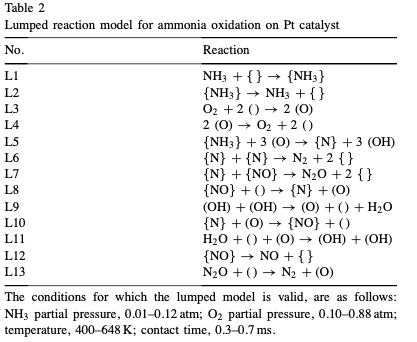

In [52]:
Image('Images/Rebrov_table2.png')

In [53]:
for commit in commit_list:
    data_dict[commit]['H3NX(29) + 3OX(10) <=> N_ads(64) + 3HOX(13)  ROP [kmol/m^2 s]'] = data_dict[commit]['H3NX(29) + OX(10) <=> H2NX(28) + HOX(13) ROP [kmol/m^2 s]'] + data_dict[commit]['H2NX(28) + OX(10) <=> HOX(13) + NH_ads(51) ROP [kmol/m^2 s]'] + data_dict[commit]['NH_ads(51) + OX(10) <=> HOX(13) + N_ads(64) ROP [kmol/m^2 s]']
L5 = ['H3NX(29) + 3OX(10) <=> N_ads(64) + 3HOX(13)  ROP [kmol/m^2 s]']
L6 = ['N2(4) + 2 X(1) <=> N2X2(25) ROP [kmol/m^2 s]'] #L6 is missing in master
L7 = [''] #L7 is missing in master
L13 = [''] #L7 is missing in master

### Draw Figure 3
#### create partial pressure, selectivity, and concentration columns in the dataframe

In [54]:
#choose species partial pressures (for X-axis of plots) 
x_axis = ['X_nh3 initial','X_o2 initial','T (K)']

conversion_species = ['NH3(6)']
selectivity_species = ['N2(4)','N2O(7)','NO(5)']
# this is H-site adsorption. no way to tell that from cantera 
coverage_species_1 = ['OX(10)', 'HOX(13)', 'X(1)'] 

# this is N-site adsorption. no way to tell that from cantera
#coverage_species_2 = ['NOX(27)', 'NX(59)', 'H3NX(29)', 'X(1)']
coverage_species_2 = ['NO_ads(27)', 'N_ads(64)', 'H3NX(29)', 'X(1)']

In [55]:
for commit in commit_list:
    for i in conversion_species:
        data_dict[commit]['NH3(6) conversion (%)'] = 100*(data_dict[commit]['X_nh3 initial'] - data_dict[commit][i])/data_dict[commit]['X_nh3 initial']
    
    for i in selectivity_species:
        data_dict[commit][f'{i} Selectivity (%)'] = 100*(data_dict[commit][i])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])

    for i in coverage_species_1:
        data_dict[commit][f'{i} Coverage'] = (data_dict[commit][i])/(data_dict[commit]['OX(10)'] + data_dict[commit]['HOX(13)']+ data_dict[commit]['X(1)'])
    
    for i in coverage_species_2:
        data_dict[commit][f'{i} Coverage'] = (data_dict[commit][i])/(data_dict[commit]['NO_ads(27)'] + data_dict[commit]['N_ads(64)']+ data_dict[commit]['H3NX(29)']+ data_dict[commit]['X(1)'])
            

In [56]:
data_dict[commit].to_csv("rebrov_ammonia_data.csv")
data_dict[commit]

,Distance (mm),T (K),P (Pa),V (M^3/s),X_nh3 initial,X_o2 initial,X_he initial,(NH3/O2),T (K) final,Rtol,...,NH3(6) conversion (%),N2(4) Selectivity (%),N2O(7) Selectivity (%),NO(5) Selectivity (%),OX(10) Coverage,HOX(13) Coverage,X(1) Coverage,NO_ads(27) Coverage,N_ads(64) Coverage,H3NX(29) Coverage
1000,9.000,498,101325.000000,2.771000e-08,0.030,0.1,0.870,0.3000,498.0,1.000000e-11,...,1.281252e+01,49.627792,0.000000e+00,8.866035e-09,0.993542,4.181715e-09,0.002017,0.997911,0.000002,0.000070
1000,9.000,498,101325.000000,2.771000e-08,0.050,0.1,0.850,0.5000,498.0,1.000000e-11,...,9.359019e+00,47.386381,0.000000e+00,7.605417e-09,0.989060,7.003270e-09,0.002046,0.997830,0.000002,0.000122
1000,9.000,498,101325.000000,2.771000e-08,0.066,0.1,0.834,0.6600,498.0,1.000000e-11,...,7.388858e+00,35.758806,0.000000e+00,5.404525e-09,0.985198,9.375250e-09,0.002083,0.997747,0.000002,0.000168
1000,9.000,498,101325.000000,2.771000e-08,0.080,0.1,0.820,0.8000,498.0,1.000000e-11,...,5.907495e+00,27.779197,0.000000e+00,4.104996e-09,0.982017,1.140562e-08,0.002072,0.997720,0.000002,0.000206
1000,9.000,498,101325.000000,2.771000e-08,0.100,0.1,0.800,1.0000,498.0,1.000000e-11,...,5.716854e+00,46.472119,0.000000e+00,6.798007e-09,0.977612,1.418045e-08,0.002077,0.997663,0.000002,0.000258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,9.000,698,101323.010374,2.771000e-08,0.050,0.8,0.150,0.0625,698.0,1.000000e-11,...,-1.642079e-02,-45.495759,-7.778498e-15,-2.084456e-06,0.999999,4.656149e-12,NaN,NaN,NaN,NaN
224,2.016,698,101324.781436,2.771000e-08,0.066,0.8,0.134,0.0825,698.0,1.000000e-11,...,2.712855e-09,45.024373,3.774576e-12,9.909574e-01,0.999999,1.631456e-12,NaN,NaN,NaN,NaN
1000,9.000,698,101324.611516,2.771000e-08,0.080,0.8,0.120,0.1000,698.0,1.000000e-11,...,1.144766e-07,47.428964,3.970306e-12,9.437205e-01,0.999999,1.800133e-12,NaN,NaN,NaN,NaN
1000,9.000,698,101324.959892,2.771000e-08,0.100,0.8,0.100,0.1250,698.0,1.000000e-11,...,7.902207e-09,45.182260,3.773858e-12,7.973460e-01,0.999999,2.019038e-12,NaN,NaN,NaN,NaN


In [60]:
O88_T598_data_dict=data_dict[commit][(data_dict[commit]['X_o2 initial'] == 0.88) &
                             (data_dict[commit]['T (K)'] == 548)]
#O88_T598_data_dict

<AxesSubplot:xlabel='X_nh3 initial', ylabel='NH3(6) conversion (%)'>

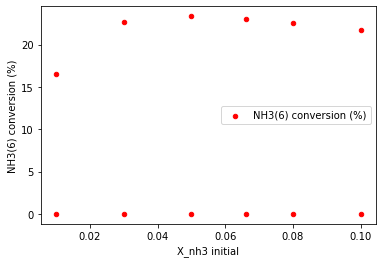

In [61]:
O88_T598_data_dict.plot.scatter(x='X_nh3 initial',y='NH3(6) conversion (%)',label='NH3(6) conversion (%)',color="r")

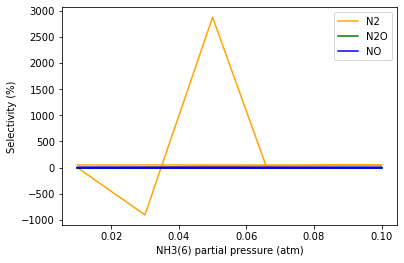

In [62]:
ax1 = O88_T598_data_dict.plot(x='X_nh3 initial',y='N2(4) Selectivity (%)',
                                     label='N2',color="orange")
ax2 = O88_T598_data_dict.plot(x='X_nh3 initial',y='N2O(7) Selectivity (%)',
                                     label='N2O',color='g', ax=ax1)
ax3 = O88_T598_data_dict.plot(x='X_nh3 initial',y='NO(5) Selectivity (%)',
                                     label='NO',color='blue', ax=ax1)
ax1.set_xlabel("NH3(6) partial pressure (atm)")
ax1.set_ylabel("Selectivity (%)")
plt.show()

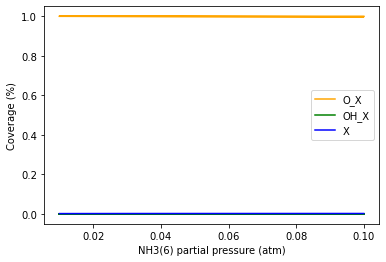

In [64]:
ax1 = O88_T598_data_dict.plot(x='X_nh3 initial',y='OX(10) Coverage',
                                     label='O_X',color="orange")
ax2 = O88_T598_data_dict.plot(x='X_nh3 initial',y='HOX(13) Coverage',
                                     label='OH_X',color='g', ax=ax1)
ax3 = O88_T598_data_dict.plot(x='X_nh3 initial',y='X(1) Coverage',
                                     label='X',color='blue', ax=ax1)
ax1.set_xlabel("NH3(6) partial pressure (atm)")
ax1.set_ylabel("Coverage (%)")
plt.show()

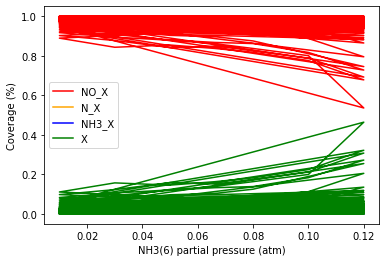

In [63]:
ax1 = data_dict[commit].plot(x='X_nh3 initial',y='NO_ads(27) Coverage',
                                     label='NO_X',color="r")
ax2 = data_dict[commit].plot(x='X_nh3 initial',y='N_ads(64) Coverage',
                                     label='N_X',color='orange', ax=ax1)
ax3 = data_dict[commit].plot(x='X_nh3 initial',y='H3NX(29) Coverage',
                                     label='NH3_X',color='b', ax=ax1)
ax4 = data_dict[commit].plot(x='X_nh3 initial',y='X(1) Coverage',
                                     label='X',color='g', ax=ax1)
ax1.set_xlabel("NH3(6) partial pressure (atm)")
ax1.set_ylabel("Coverage (%)")
plt.show()

In [40]:
# for commit in commit_list:
#     data_dict[commit][f'NH3(6) partial pressure (atm)'] =  data_dict[commit]['X_nh3 initial']*data_dict[commit]['P (Pa)']/101325
    
# selectivity_species = [df_698K['NO(5) Selectivity (%)'],df_698K['N2O(7) Selectivity (%)'],df_698K['N2(4) Selectivity (%)']]

In [77]:
for commit in commit_list:
    data_dict[commit][f'NH3(6) partial pressure (atm)'] =  data_dict[commit]['X_nh3 initial']*data_dict[commit]['P (Pa)']/101325
    nh3_pressure = data_dict[commit][f'NH3(6) partial pressure (atm)']

In [41]:
# for commit in commit_list:
#     for i in selectivity_species:
#         data_dict[commit][f'{i} Selectivity (%)'] = 100*(data_dict[commit][i])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])
#         selectivity = data_dict[commit][f'{i} Selectivity (%)']
#         print(selectivity[0:108])
#         fig, ax = plt.subplots(len(selectivity),1,figsize=(10,30), constrained_layout = True)
#         color_dict = { 0:"r", 1:"gold", 2:"pink", 3:"yellowgreen",4:"lightskyblue"}
            
#         for p,j in enumerate(selectivity):
#             data_dict[commit][(data_dict[commit][f'{i} Selectivity (%)'] == j) &
#                              (data_dict[commit]['T (K)'] == temp)].plot.scatter(x='NH3(6) partial pressure (atm)', 
#                                                                                  y=selectivity[0:3], 
#                                                                                  label='NH3(6) conversion (%)', 
#                                                                                  ax=ax[p], 
#                                                                                  color="r")

#             ax[p].set_title(f'{commit} \nmole frac O2 = {j} \ntemperature {temp}')


#### Selectivity and Coverage

In [62]:
for commit in commit_list:
    data_dict[commit]['NO selectivity (%)'] = 100*(data_dict[commit]['NO(5)'])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])
    #print(data_dict[commit]['NO selectivity (%)'])
    no_selectivity = data_dict[commit]['NO selectivity (%)'] 

    data_dict[commit]['N2O selectivity (%)'] = 100*(data_dict[commit]['N2O(7)'])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])
    #print(data_dict[commit]['N2O selectivity (%)'])
    n2o_selectivity = data_dict[commit]['N2O selectivity (%)']

    data_dict[commit]['N2 selectivity (%)'] = 100*(data_dict[commit]['N2(4)'])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])
    #print(data_dict[commit]['N2 selectivity (%)'])
    n2_selectivity = data_dict[commit]['N2 selectivity (%)']

    S_N2 = n2_selectivity/(n2_selectivity + no_selectivity + n2o_selectivity)*100
    S_NO = no_selectivity/(n2_selectivity + no_selectivity + n2o_selectivity)*100
    S_N2O = n2o_selectivity/(n2_selectivity + no_selectivity + n2o_selectivity)*100
    

#### NH3 initial partial pressure

In [42]:
for commit in commit_list:
    data_dict[commit][f'X_nh3 initial'] =  data_dict[commit]['X_nh3 initial']*data_dict[commit]['P (Pa)']/101325
    nh3_pressure = data_dict[commit][f'X_nh3 initial'] 

In [43]:
nh3_pressure

1000    0.030
1000    0.050
1000    0.066
1000    0.080
1000    0.100
        ...  
1000    0.050
1000    0.066
1000    0.080
1000    0.100
1000    0.120
Name: X_nh3 initial, Length: 566, dtype: float64

In [44]:
for i in selectivity_species:
    data_dict[commit][f'{i} Selectivity (%)'] = 100*(data_dict[commit][i])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])
    print(data_dict[commit][f'{i} Selectivity (%)'])

1000    49.627792
1000    47.386381
1000    35.758806
1000    27.779197
1000    46.472119
          ...    
1000    49.382704
1000    49.188383
1000    49.019601
1000    48.780482
1000    48.543685
Name: N2(4) Selectivity (%), Length: 566, dtype: float64
1000    0.0
1000    0.0
1000    0.0
1000    0.0
1000    0.0
       ... 
1000    0.0
1000    0.0
1000    0.0
1000    0.0
1000    0.0
Name: N2O(7) Selectivity (%), Length: 566, dtype: float64
1000    8.866035e-09
1000    7.605417e-09
1000    5.404525e-09
1000    4.104996e-09
1000    6.798007e-09
            ...     
1000    2.346940e-05
1000    1.705745e-05
1000    1.373877e-05
1000    1.072338e-05
1000    8.769292e-06
Name: NO(5) Selectivity (%), Length: 566, dtype: float64


In [45]:
for commit in commit_list:
    for i in selectivity_species:
        data_dict[commit][f'{i} Selectivity (%)'] = 100*(data_dict[commit][i])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])    
        selectivityNO = data_dict[commit][f'{i} Selectivity (%)']#.unique()
        selectivityN2O = data_dict[commit][f'{i+1} Selectivity (%)']
       # print(selectivity)
        plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
        plt.plot(nh3_pressure[0:10], selectivityNO[0:10],nh3_pressure[0:10], selectivityN2O[0:10])
        plt.xlabel('NH3(6) partial pressure (atm)',fontsize=15)
        plt.ylabel(f'{i} Selectivity (%)',fontsize=15)
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
        plt.title(f'{commit} \ntemperature {temp}',fontsize=15)
        plt.show()

TypeError: can only concatenate str (not "int") to str

In [ ]:
for commit in commit_list:
    
    for temp in temps:
        # get keys for O2 (X_o2 initial)
        o2_ratio = data_dict[commit_list[0]]['O2(2) partial pressure (atm)'].unique()

        # set figure size 
        fig, ax = plt.subplots(len(o2_ratio),1,figsize=(10,30), constrained_layout = True)

        # make a list of markers
        color_dict = { 0:"r", 1:"gold", 2:"pink", 3:"yellowgreen",4:"lightskyblue"}
    
        for p,j in enumerate(o2_ratio):
            data_dict[commit][(data_dict[commit]['O2(2) partial pressure (atm)'] == j) &
                             (data_dict[commit]['T (C)'] == temp)].plot.scatter(x='NH3(6) partial pressure (atm)', 
                                                                                 y='NH3(6) conversion (%)', 
                                                                                 label='NH3(6) conversion (%)', 
                                                                                 ax=ax[p], 
                                                                                 color="r")

            ax[p].set_title(f'{commit} \nmole frac O2 = {j} \ntemperature {temp}')


In [30]:
# for commit in commit_list:
#     for m in x_axis_nh3:
#         temps = data_dict[commit_list[0]]['T (K)'].unique()
#        # print(temps)
#         for i in selectivity_species:
#             data_dict[commit][f'{i} Selectivity (%)'] = 100*(data_dict[commit][i])/(data_dict[commit]['X_nh3 initial'] - data_dict[commit]['NH3(6)'])
#             #print(data_dict[commit][f'{i} Selectivity (%)'])
#             for temp in temps:
#                 Selectivity1 = data_dict[commit][i]
#                 #print(f'{i} Selectivity (%) is {Selectivity1} at T = {temp}')
#                 for p,j in enumerate(Selectivity1):
#                     data_dict[commit][(data_dict[commit][i] == j) &
#                                  (data_dict[commit]['T (K)'] == temp)].plot.scatter(x='NH3(6) partial pressure (atm)', 
#                                                                                      y=Selectivity1, 
#                                                                                      label='Selectivity(%)', 
#                                                                                      ax=ax[p], 
#                                                                                      color="r")

#                     ax[p].set_title(f'{commit} \nmole Selectivity {i} = {j} \ntemperature {temp}')

In [28]:
df_t_225_02_0_88_data_dict=data_dict[commit][(data_dict[commit]['O2(2) partial pressure (atm)'] == 0.88) &
                             (data_dict[commit]['T (C)'] == 225)]

In [29]:
df_t_225_02_0_88_data_dict

,Distance (mm),T (C),P (Pa),V (M^3/s),X_nh3 initial,X_o2 initial,X_he initial,(NH3/O2),T (C) final,Rtol,...,HNOX(136) + NO2X2(466) <=> NO_X(26) + SX(146) ROP [kmol/m^2 s],SX(146) + X(1) <=> HOX(13) + NOX2(132) ROP [kmol/m^2 s].1,N_X(25) + SX(146) <=> HNOX(136) + NOX2(132) ROP [kmol/m^2 s].2,N_X(25) + SX(146) <=> HNOX(136) + NOX2(132) ROP [kmol/m^2 s].3,NO2(30) + 2 X(1) <=> NO2X2(248) ROP [kmol/m^2 s],NO2X2(248) + OX(10) <=> NOX2(132) + O2X(731) ROP [kmol/m^2 s],NH3(6) conversion (%),NO(5) selectivity (%),NH3(6) partial pressure (atm),O2(2) partial pressure (atm)
921,8280.0,225,101325.0,2.715500e-08,0.010,0.88,0.110,0.011364,225.0,1.000000e-08,...,-5.168881e-72,3.417907e-61,2.962649e-47,2.962649e-47,6.222660e-58,4.630594e-58,2.585369e-06,1.515396e-29,0.010,0.88
235,2106.0,225,101325.0,2.715500e-08,0.020,0.88,0.100,0.022727,225.0,1.000000e-08,...,1.829502e-59,-2.670272e-57,-3.464858e-43,-3.464858e-43,-3.819620e-65,-2.691550e-66,-1.309972e-05,-5.140747e-38,0.020,0.88
420,3771.0,225,101325.0,2.715500e-08,0.025,0.88,0.095,0.028409,225.0,1.000000e-08,...,2.851775e-47,1.011025e-50,1.509520e-36,1.509520e-36,2.184174e-54,4.229134e-55,-2.642432e-06,-5.146292e-36,0.025,0.88
98,873.0,225,101325.0,2.715500e-08,0.070,0.88,0.050,0.079545,225.0,1.000000e-08,...,1.661289e-72,0.000000e+00,0.000000e+00,0.000000e+00,-7.709948e-74,3.998287e-70,-1.745461e-07,-4.312019e-35,0.070,0.88


<AxesSubplot:xlabel='NH3(6) partial pressure (atm)', ylabel='NH3(6) conversion (%)'>

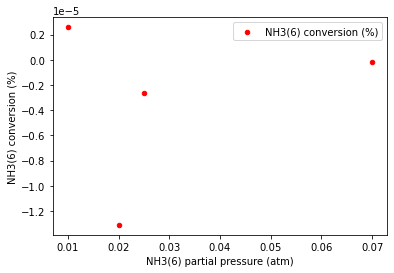

In [31]:
df_t_225_02_0_88_data_dict.plot.scatter(x='NH3(6) partial pressure (atm)', 
                                        y='NH3(6) conversion (%)', 
                                        label='NH3(6) conversion (%)', 
                                        color="r")

In [ ]:
#If set up different temp ranges
df_498K = data_dict[commit][data_dict[commit]['T (K)'] == 498]
df_523K = data_dict[commit][data_dict[commit]['T (K)'] == 523]
df_548K = data_dict[commit][data_dict[commit]['T (K)'] == 548]
df_573K = data_dict[commit][data_dict[commit]['T (K)'] == 573]
df_598K = data_dict[commit][data_dict[commit]['T (K)'] == 598]
df_623K = data_dict[commit][data_dict[commit]['T (K)'] == 623]
df_648K = data_dict[commit][data_dict[commit]['T (K)'] == 648]
df_698K = data_dict[commit][data_dict[commit]['T (K)'] == 698]

fig = plt.figure()
ax = plt.axes()
#plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.plot(df_698K['X_nh3 initial'], df_698K['N2(4) Selectivity (%)'], label = 'N2')
plt.plot(df_698K['X_nh3 initial'], df_698K['N2O(7) Selectivity (%)'], label = 'N2O')
plt.plot(df_698K['X_nh3 initial'], 1e5*df_698K['NO(5) Selectivity (%)'], label = 'NO')
plt.xlabel('NH3')
plt.ylabel('Selectivity')
plt.title('X_NH3 v.s. Selectivity Plot ')
plt.legend()

plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
plt.plot(nh3_pressure[0:11], 1e5*no_selectivity[96:107],label= "NO*e5")
plt.plot(nh3_pressure[0:11], 1e5*n2o_selectivity[96:107],label= "N2O*e5")
plt.plot(nh3_pressure[0:11], n2_selectivity[96:107],label= "N2")
plt.xlabel('NH3(6) partial pressure (atm)',fontsize=15)
plt.ylabel('Selectivity (%)',fontsize=15)
plt.minorticks_on()
plt.title('Temperature = 698K' ,fontsize=15)
plt.legend()

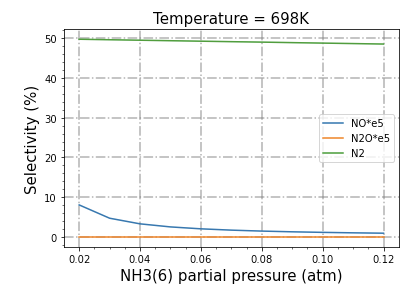
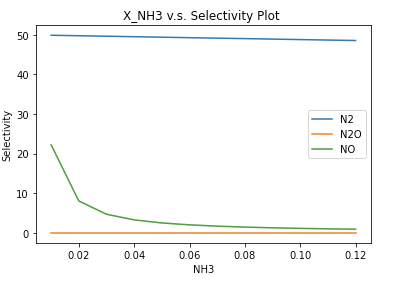